<a href="https://colab.research.google.com/github/JozeRamos/BigData/blob/main/BDC2024-HW2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Big Data Computing 2024 - Homework 2 - Deadline: December 22$^{nd}$, 11.59pm

# Instructions for the homework
  > Follow the instructions in the notebook carefully



## General instructions
  * Do NOT remove ANYTHING that is already in the notebook.
  * Before you start, show the line number for the code cells:
    * Go to Tools -> Settings -> Editor -> show line numbers
  * The group in the second Homework **MUST BE EXACTLY THE SAME** as in Homework 1
  * The software must be commented.
  * About this notebook:
    * Create a personal copy to be able to modify it: File > Save a copy in Drive
    * Rename the copied notebook `BDC2024-HW2.ipynb`


## Instructions for **code**:
  * DO NOT add code cells
  * DO NOT remove any code cells
  * Only edit the code cells containing the comment `#YOUR CODE STARTS HERE#`. Within those cells:
    * DO NOT remove ANYTHING that we have written (otherwise specified).
    * Add your code between line `#YOUR CODE STARTS HERE#` and line `#YOUR CODE ENDS HERE#`; **DO NOT REMOVE THESE COMMENTS**

> Ensure that the notebook can be faithfully reproduced by anyone (hint: pseudo random number generation).

> **If you need to set a random seed, set it to `1224`.**

[comment]: <> (#REMOVE_CELL#)


## Instructions for **text**:
* DO NOT add text cells
* DO NOT remove text cells
* DO NOT modify the text cells we have created.
* Only edit text cells starting with the comment ------------YOUR TEXT STARTS HERE------------. Within those cells:
  * Do NOT remove anything we have entered.
  * **Add your own text after the line ------------YOUR TEXT STARTS HERE------------; DO NOT REMOVE THIS TEXT**
  * For each cell, a specific delivery will be given. If you are given a maximum number of sentences to write, both the dot "." and the semicolon ";" will be considered sentence dividers.

[comment]: <> (#REMOVE_CELL#)


## *Evaluation*

The homework will be evaluated based on the following criteria:

1. **Code Quality**: correctness, readability (length, comments, unnecessary repetitions)
2. **Quality of Textual Responses**: correctness, clarity, etc.
3. **Quality of Produced Visualizations** (tables/figures/etc.): correctness, clarity, etc.
4. **Quality**, **quantity** and **diversity** of experiments conducted, **results** achieved, etc. \[if applicable; will be clearly indicated\]
5. **Timely Submission**: late submissions will result in significant point deductions
6. **Plagiarism**: copying code/text from colleagues or online sources will result in significant point deductions \[it will be clearly indicated if borrowing code from other sources is allowed\]

*You are expected to work in a principled way, being aware of what you are doing and why*

[comment]: <> (#REMOVE_CELL#)

## Group Composition
Write down the list of group members. The format should be Last Name, First Name, Student ID. Group members should be sorted alphabetically by surname and placed on different lines.
Example:

Becchetti, Luca, 123456

Siciliano, Federico, 987654

**Remember:** your group in the second homework must be the same as in the first one.



## Submission (read carefully)

1. This notebook is one of two parts of a Google Classroom assignment, hence it should be delivered using Google Classroom. Your delivery for Homework 2 will thus consist of two files (like for Homework 1): i) this notebook; ii) a pdf with your answers to the theoretical assignments.
2. Each notebook should be delivered *only once*, by the student whose last name comes first in alphabetical order in your group. So for example, if the group consists of Luca Becchetti and Federico Siciliano, Luca Becchetti (and *he only*) will deliver the homework (Federico Siciliano might well pay attention that Luca Becchetti actually does so within the mandatory deadline :-))
3. You can upload multiple files as part of the same assignment in Google Classroom. Please be sure that you only press the Classroom's "hand in" button ("Consegna" in Italian) after you have uploaded the final versions of this notebook and of the pdf containing your answers to the theoretical questions.

## Homework 2 (notebook)
We want to perform topic distillation/[keyword extraction](https://en.wikipedia.org/wiki/Keyword_extraction) using the techniques seen in class, in particular: 1) $k$-means preceeded by dimensionality reduction techniques and 2) SVD or PCA alone, as seen in class. You will use the [20 newsgroups dataset](https://scikit-learn.org/0.19/datasets/twenty_newsgroups.html), in particular the ```['comp.graphics', 'rec.motorcycles', 'rec.sport.baseball', 'sci.space', 'talk.religion.misc']```categories.

##Software and dataset
Use the cell below to import **ALL** Python packages that you need for this homework.

Add them in this cell as you proceed with the implementation


In [51]:
#REMOVE_OUTPUT#
!pip install --upgrade --no-cache-dir gdown
#YOUR CODE STARTS HERE#
import nltk
from sklearn.datasets import fetch_20newsgroups
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from time import time
import numpy as np
from sklearn.cluster import KMeans
from sklearn import metrics
from sklearn.random_projection import SparseRandomProjection as srp
from sklearn.preprocessing import Normalizer
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import TruncatedSVD
from wordcloud import WordCloud
import matplotlib.pyplot as plt
#YOUR CODE ENDS HERE#
#THIS IS LINE 15#

Next, download the dataset as specified earlier

In [31]:
#YOUR CODE STARTS HERE#
#List with all the categories
categories = ['comp.graphics', 'rec.motorcycles', 'rec.sport.baseball', 'sci.space', 'talk.religion.misc']

#Dataset
dataset = fetch_20newsgroups(subset='all', categories=categories,
                             shuffle=False, remove=('headers', 'footers', 'quotes'))

#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

## Part 1 - keyword extraction/topic distillation using $k$-means
As a baseline, cluster documents using standard $k$-means. The number of clusters will be equal to the number of categories you downloaded. Quality will be measured as follows:
- Soundness of identified keywords: build word clouds of 20 most important keywords for each cluster
- Time efficiency
- Clustering quality with respect to true labels: [Adjusted Rand Index](https://en.wikipedia.org/wiki/Rand_index) (see scikit-learn documentation about)

This part must run within a maximum of **15** minutes. To meet this constraint, approximations can be made (using fewer documents, reducing dictionary size). However, these approximations **must be explicitly indicated** in the code.

### 1.1
If you need to, prepare here helper functions to run your computations.

In [60]:
#YOUR CODE STARTS HERE#
def lemmatization(dataset):
  lemmatizer = WordNetLemmatizer()
  for i in range(len(dataset.data)):
      word_list = word_tokenize(dataset.data[i])
      lemmatized_doc = ""
      for word in word_list:
          lemmatized_doc = lemmatized_doc + " " + lemmatizer.lemmatize(word)
      dataset.data[i] = lemmatized_doc
  return dataset

def K_Means(X, true_k):
  km = KMeans(n_clusters=true_k, init='k-means++', n_init=20, max_iter=100) #change to 300
  t0 = time()
  km.fit(X)
  K_Time = time() - t0
  return [km, K_Time]

def print_wordclouds(km, true_k, vectorizer):
    centroids = km.argsort()[:, ::-1]
    terms = vectorizer.get_feature_names_out()

    for i in range(true_k):
        word_freq = {terms[ind]: km[i, ind] for ind in centroids[i, :20]}
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(f'Cluster {i}')
        plt.show()
        print("\n")







#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

###1.2
Text pre-processing and vectorization goes here

In [33]:
#YOUR CODE STARTS HERE#
labels = dataset.target
true_k = len(np.unique(labels)) ## This should be 5 in this example

nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

dataset = lemmatization(dataset)

vectorizer = TfidfVectorizer(stop_words='english') ## Corpus is in English
X = vectorizer.fit_transform(dataset.data).toarray() ## X is a sparse matrix --> we make it dense for fair comparison

transformer = srp(n_components=1000, dense_output=True) # Using a dense representation for the matrix
X_proj = transformer.fit_transform(X)

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


### 1.1.3
Initiate time calculation for Part 1.

In [34]:
#YOUR CODE STARTS HERE#



start_time = time()



#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

###1.1.4
Run $k$-means

In [35]:
#YOUR CODE STARTS HERE#


[km,K_Time] = K_Means(X, true_k)


[km_proj,K_Time_proj] = K_Means(X_proj, true_k)

#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Print Adjusted Rand Index and Time efficiency.

In [62]:
#YOUR CODE STARTS HERE#
#print the results for standart KMeans
print("Adjusted Rand-Index for standart KMeans: %.3f" % metrics.adjusted_rand_score(labels, km.labels_))
print(("Time efficiency for standart KMeans: %0.3fs" % K_Time))

#print the results for KMeans with random projections first
print("\nAdjusted Rand-Index for KMeans with random projections first: %.3f" % metrics.adjusted_rand_score(labels, km_proj.labels_))
print(("Time efficiency for KMeans with random projections first: %0.3fs" % K_Time_proj))
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Adjusted Rand-Index for standart KMeans: 0.162
Time efficiency for standart KMeans: 175.845s

Adjusted Rand-Index for KMeans with random projections first: 0.102
Time efficiency for KMeans with random projections first: 8.711s


Print, for each cluster, wordcloud of 20 most important keyworkds.

Wordcloud of 20 most important keywords for the standart KMeans:



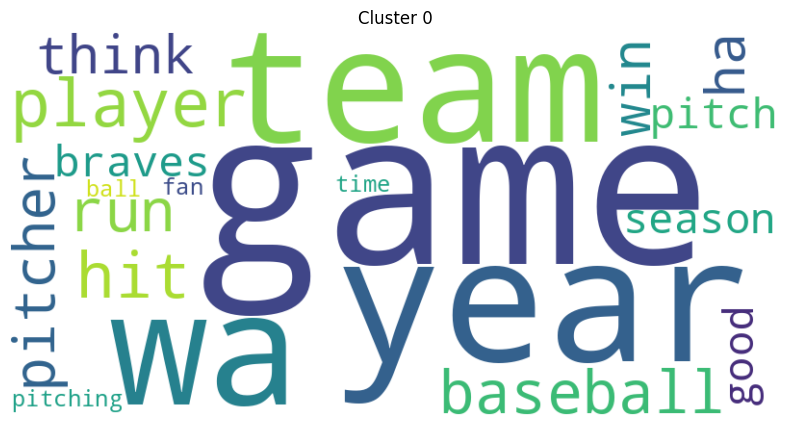

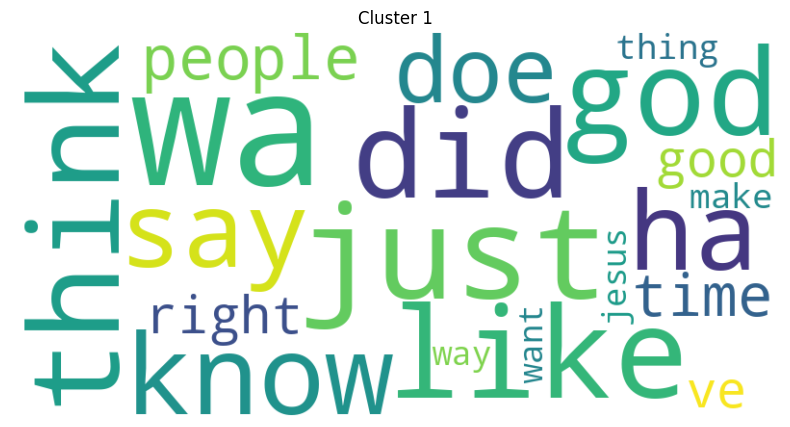

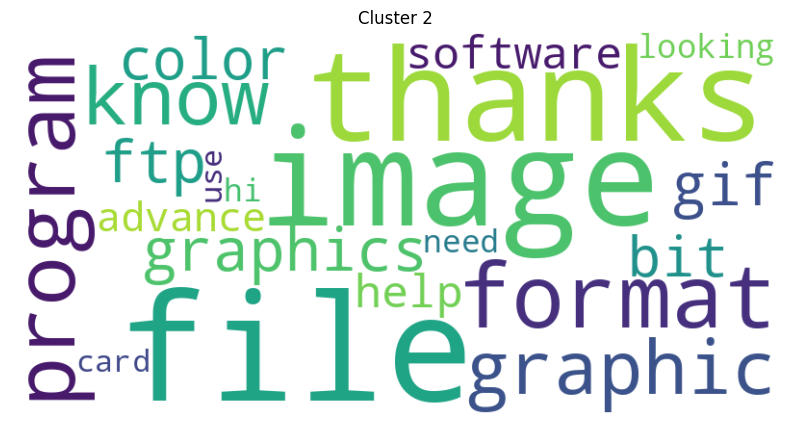

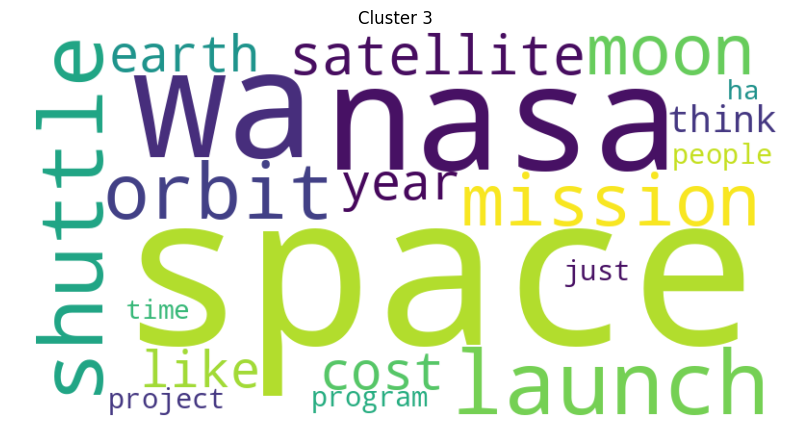

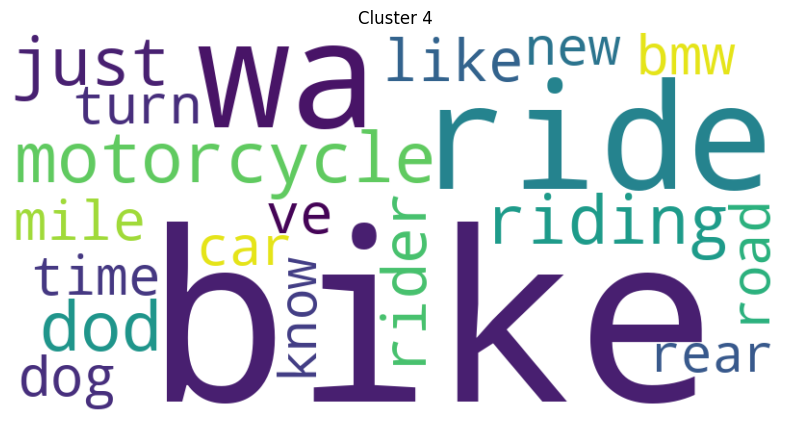




Wordcloud of 20 most important keywords for the KMeans with random projections first:



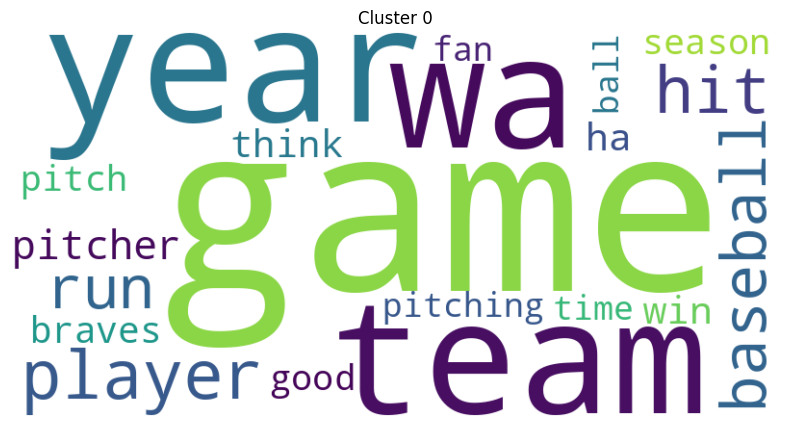

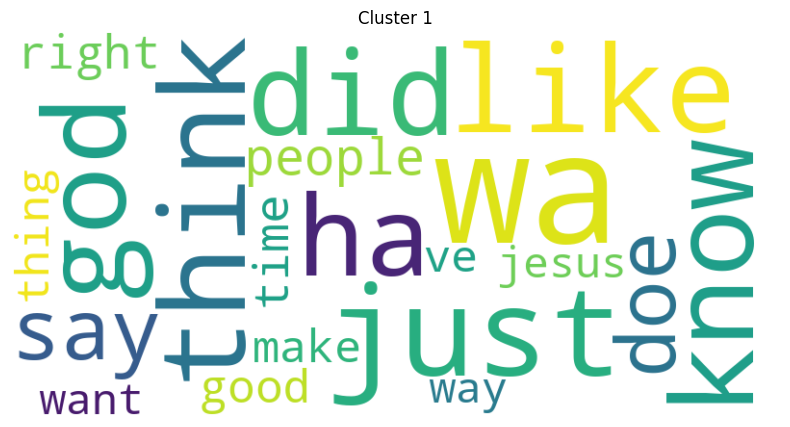

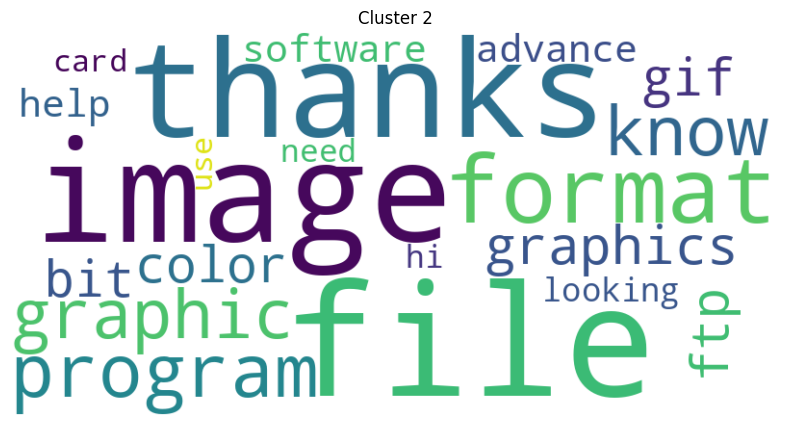

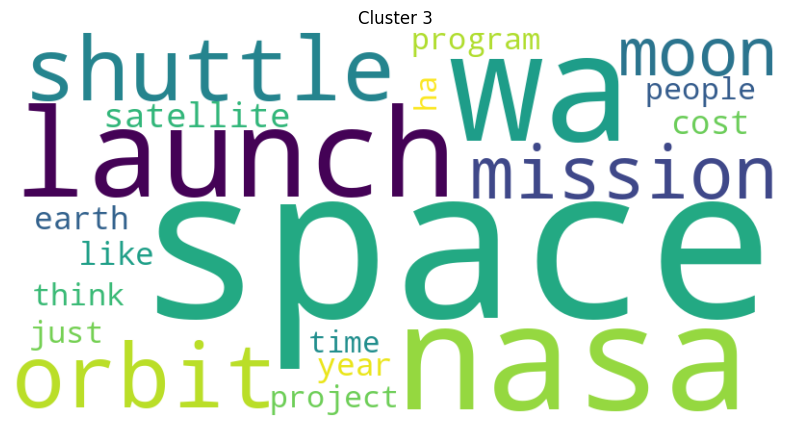

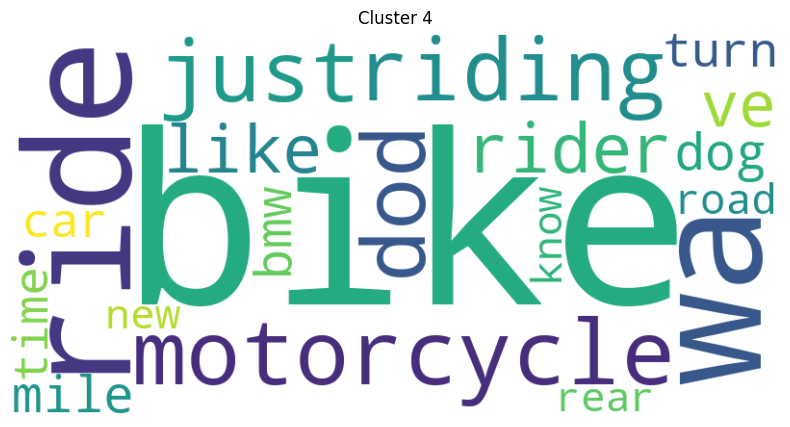

In [61]:
#YOUR CODE STARTS HERE#
print("Wordcloud of 20 most important keywords for the standart KMeans:\n")
print_wordclouds(km.cluster_centers_, true_k, vectorizer)

centroids = np.zeros((true_k, X.shape[1])) # Initializing true_k centroid arrays
cluster_sizes = [0]*true_k # For each cluster, the number of points it contains, needed for taking average
for i in range(X_proj.shape[0]):
    index = int(km.labels_[i]) # index is the index of the cluster the i-th point belongs to
    centroids[index] += X[i] # Adding component-wise
    cluster_sizes[index] += 1
for i in range(true_k):
    centroids[i] = centroids[i]/cluster_sizes[i] # Computing centroids: take sum and divide by cluster size

print("\nWordcloud of 20 most important keywords for the KMeans with random projections first:\n")
print_wordclouds(centroids, true_k, vectorizer)



#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Summarize your results in 4 sentences at most.

------------YOUR TEXT STARTS HERE------------


## Part 2 - keyword extraction/topic distillation using Latent Semantic Analysis
We use Truncated SVD as an alternative baseline. In this case, we use the first $k$ components (singular vectors, with $k = 5$ in our case) of the Truncated SVD as descriptions of the latent topics and we identify the terms that are the most important for each component, as seen in class. Quality will be measured as follows:
- Soundness of identified keywords: build word clouds of 20 most important keywords for each cluster
- Time efficiency

This part must run within a maximum of **15** minutes. To meet this constraint, approximations can be made (using fewer documents, reducing dictionary size). However, these approximations **must be explicitly indicated** in the code.

### 2.1
If you need to, prepare here helper functions to run your computations.

In [38]:
#YOUR CODE STARTS HERE#





































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

###2.2
If you need to perform further text pre-processing and/or vectorization or redo it from scratch do it here. In this case, comment your code below to explain why you are doing this. Otherwise, leave the next cell empty.

In [39]:
#YOUR CODE STARTS HERE#

















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 2.3
Initiate time calculation for Part 2.

In [40]:
#YOUR CODE STARTS HERE#


start_time2 = time()




#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

###2.4
Perform Latent Semantic Analysis

In [41]:
#YOUR CODE STARTS HERE#

svd = TruncatedSVD(true_k)

normalizer = Normalizer(copy=False)
lsa = make_pipeline(svd, normalizer)
Y = lsa.fit_transform(X)
LSA_time = time() - start_time2
#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

Print Time efficiency.

In [63]:
#YOUR CODE STARTS HERE#

print(("Time efficiency for Latent Semantic Analysis: %0.3fs" % LSA_time))


#YOUR CODE ENDS HERE#
#THIS IS LINE 7#

Time efficiency for Latent Semantic Analysis: 8.855s


Print, for each cluster, wordcloud of 20 most important keyworkds.


Wordcloud of 20 most important keywords for the KMeans with random projections first:



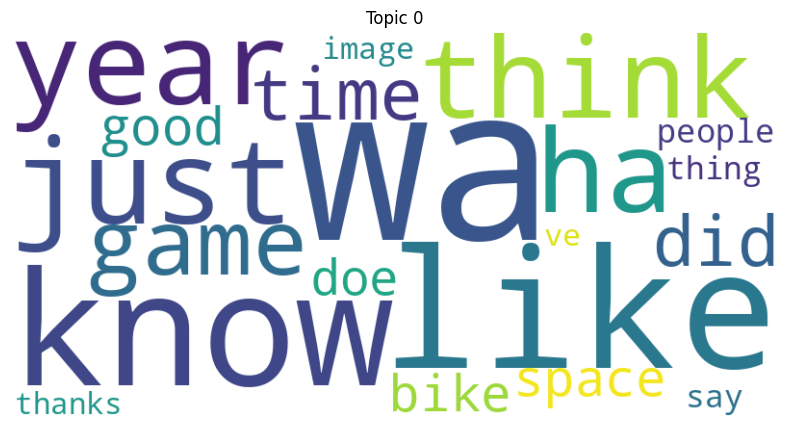

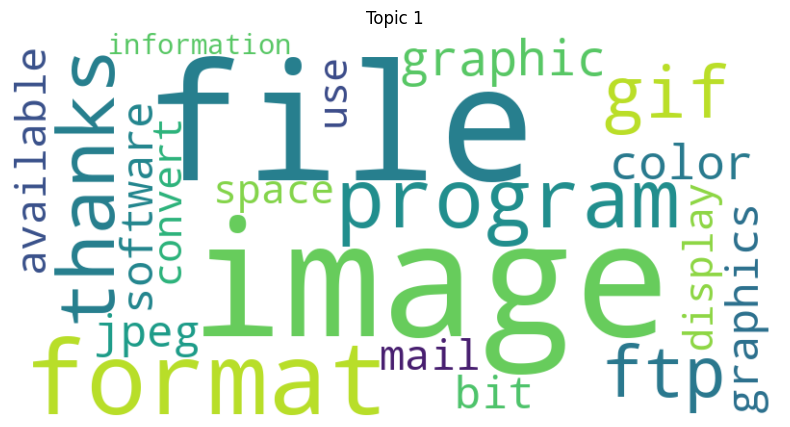

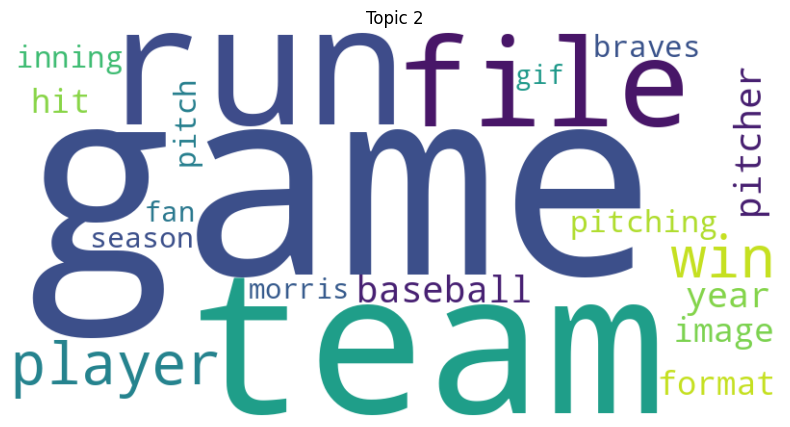

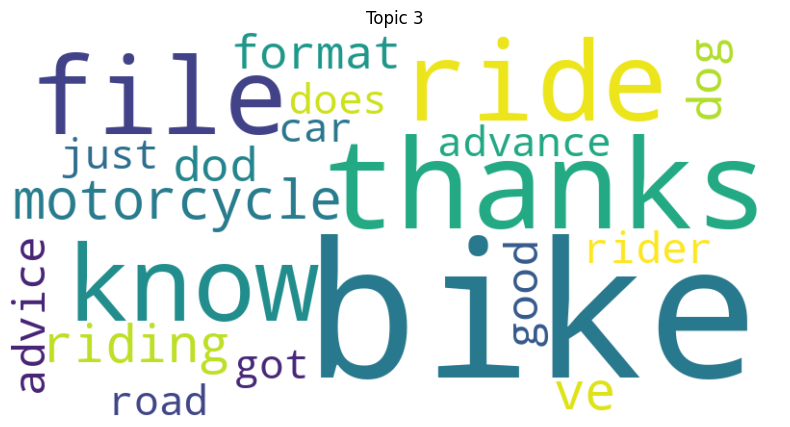

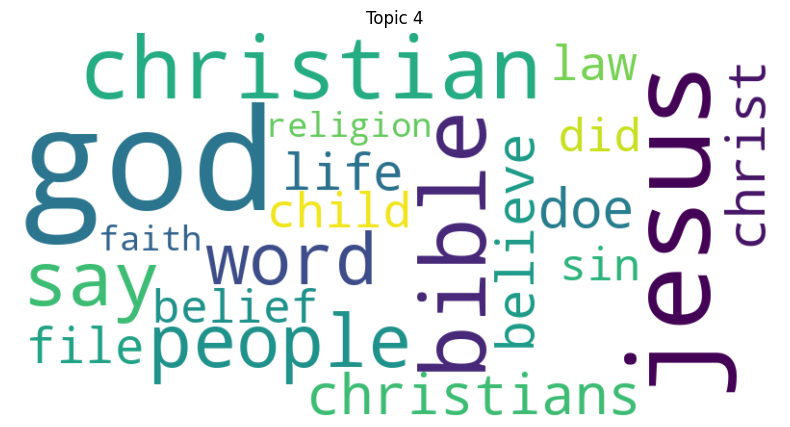

In [66]:
#YOUR CODE STARTS HERE#
print("\nWordcloud of 20 most important keywords for the KMeans with random projections first:\n")

# Extract the terms from the vectorizer
terms = vectorizer.get_feature_names_out()

# Generate and display word clouds for each topic
for i, comp in enumerate(svd.components_):
    word_freq = {terms[j]: comp[j] for j in comp.argsort()[:-20 - 1:-1]}
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(f'Topic {i}')
    plt.show()
    print("\n")

#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Summarize your results in 4 sentences at most.

------------YOUR TEXT STARTS HERE------------


## Part 3 - keyword extraction/topic distillation using Truncated SVD + $k$-means
In this case, we i) first embed documents, i.e., project them onto the space spanned by the first $m$ singular vectors (for a suitable choice of $m$, see further) and then ii) we cluster the $m$-dimensional vectors thus obtained using $k$-means as before. Quality will be measured as follows:
- Clustering quality with respect to true labels: Adjusted Rand Index (see scikit-learn documentation about)
- Soundness of identified keywords: build word clouds of 20 most important keywords for each cluster
- Time efficiency

To determine the number $m$ of singular components to keep, use the elbow method to identify a first tentative value and then the adjusted Rand Index to find the right value. For example, if you plot total explained variance for $m$ ranging from $1$ to $100$ (or perhaps even 50), you are likely to see a clear elbow. Assume you identify 30 as a tentative value. To find the best choice for $m$, you can compute the adjusted Rand index of the corresponding clustering for all values of $m$ in a neighbourhood of $30$ (e.g., in the range $\{25,\ldots , 35\}$) and pick the value for which the index is maximum. This is just a simple heuristic, given to you as an example. If you think you found a better one you are free to use it, but you should briefly explain how it works. You are encouraged to use more principled heuristics proposed in the literature to choose $m$, in which case you should provide references about.

This part must run within a maximum of **20** minutes. To meet this constraint, approximations can be made (using fewer documents, reducing dictionary size). However, these approximations **must be explicitly indicated** in the code.

### 3.1
If you need to, prepare here helper functions to run your computations.

In [44]:
#YOUR CODE STARTS HERE#





































#YOUR CODE ENDS HERE#
#THIS IS LINE 40#

###3.2
If you need to perform further text pre-processing and/or vectorization or redo it from scratch do it here. In this case, comment your code below to explain why you are doing this. Otherwise, leave the next cell empty.

In [45]:
#YOUR CODE STARTS HERE#

















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

### 3.3
Initiate time calculation for Part 3.

In [46]:
#YOUR CODE STARTS HERE#




start_time3 = time()


#YOUR CODE ENDS HERE#
#THIS IS LINE 10#

###3.4
Perform Truncated SVD and identify your best choice for the number $m$ of components to keep. Briefly explain the strategy you adopt to find $m$, using at most 5 lines in the text cell below. If you are simply following the heuristic I suggested above (which I did not test but might do a decent job), please just briefly state this.

------------YOUR TEXT STARTS HERE------------


Next, write your code to identify the best value of $m$.

In [47]:
#YOUR CODE STARTS HERE#






























#YOUR CODE ENDS HERE#
#THIS IS LINE 33#

###3.5
Perform Truncated SVD (again if you did not save the results of the previous computation) with the number $m$ of components identified above. Cluster the projections of the documents onto the first $m$ components using $k$-means ($k = 5$ in our case).

In [48]:
#YOUR CODE STARTS HERE#

















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Print Time efficiency.

In [49]:
#YOUR CODE STARTS HERE#




#YOUR CODE ENDS HERE#
#THIS IS LINE 7#

Print, for each cluster, wordcloud of 20 most important keyworkds.

In [50]:
#YOUR CODE STARTS HERE#

















#YOUR CODE ENDS HERE#
#THIS IS LINE 20#

Summarize your results in 4 sentences at most.

------------YOUR TEXT STARTS HERE------------
